In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import locale

try:
    locale.setlocale(locale.LC_ALL, 'Portuguese_Portugal.1252')
except locale.Error:
    try:
        locale.setlocale(locale.LC_ALL, 'pt_PT')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_ALL, 'pt_PT.UTF-8')
        except locale.Error:
            print("Aviso: Não foi possível definir o locale para português. Nomes dos meses podem aparecer em inglês.")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 16

In [2]:
data_path = 'data/'

df_clientes = pd.read_csv(f'{data_path}clientes.csv', encoding='utf-8')
df_produtos = pd.read_csv(f'{data_path}produtos.csv', encoding='utf-8')
df_vendas = pd.read_csv(f'{data_path}vendas.csv', encoding='utf-8')
df_marketing_campanhas = pd.read_csv(f'{data_path}marketing_campanhas.csv', encoding='utf-8')

print("--- df_clientes ---")
print(df_clientes.head())
print("\n--- df_produtos ---")
print(df_produtos.head())
print("\n--- df_vendas ---")
print(df_vendas.head())
print("\n--- df_marketing_campanhas ---")
print(df_marketing_campanhas.head())

--- df_clientes ---
  ID_Cliente             Nome_Cliente                         Email  \
0   CLI-0001     Bryan Freitas-Vieira           mauro08@example.net   
1   CLI-0002         Adriana da Cunha  franciscobarbosa@example.org   
2   CLI-0003  Madalena Domingues-Cruz         william89@example.org   
3   CLI-0004           Frederico Lima        pilargomes@example.net   
4   CLI-0005               Rui Barros       cristiano80@example.com   

  Localizacao         Segmento  
0      Valbom  Pequena Empresa  
1   Freamunde      Empresarial  
2    Portimão      Empresarial  
3    Barcelos       Consumidor  
4   Rio Tinto       Consumidor  

--- df_produtos ---
  ID_Produto                          Nome_Produto     Marca      Categoria  \
0  PROD-0001          Logitech Leve Unidade Sensor  Logitech      Segurança   
1  PROD-0002       Samsung Eficiente Disco Externo   Samsung  Armazenamento   
2  PROD-0003  Dyson Eficiente Acessório Iluminação     Dyson     Smart Home   
3  PROD-0004      

In [3]:
df_vendas['Data_Venda'] = pd.to_datetime(df_vendas['Data_Venda'])

df_vendas.drop_duplicates(inplace=True)

df_vendas = pd.merge(df_vendas, df_produtos[['ID_Produto', 'Preco_Unitario', 'Custo_Unitario', 'Categoria', 'Marca', 'Nome_Produto']],
                     on='ID_Produto',
                     how='left'
                    )

df_vendas['Preco_Unitario'].fillna(0, inplace=True)
df_vendas['Custo_Unitario'].fillna(0, inplace=True)
df_vendas.dropna(subset=['Preco_Unitario', 'Custo_Unitario'], inplace=True)

df_vendas['Preco_Total_Venda'] = df_vendas['Quantidade'] * df_vendas['Preco_Unitario']
df_vendas['Custo_Total_Venda'] = df_vendas['Quantidade'] * df_vendas['Custo_Unitario']

df_vendas['Margem_Bruta_Venda'] = df_vendas['Preco_Total_Venda'] - df_vendas['Custo_Total_Venda']

df_vendas['Ano'] = df_vendas['Data_Venda'].dt.year
df_vendas['Mes'] = df_vendas['Data_Venda'].dt.month
df_vendas['Dia'] = df_vendas['Data_Venda'].dt.day
df_vendas['Dia_Semana'] = df_vendas['Data_Venda'].dt.dayofweek
df_vendas['Nome_Mes'] = df_vendas['Data_Venda'].dt.strftime('%B')

print("Primeiras linhas de df_vendas após limpeza e feature engineering:")
print(df_vendas.head())
print("\nInfo de df_vendas após limpeza:")
print(df_vendas.info())

C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\4103612030.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_vendas['Preco_Unitario'].fillna(0, inplace=True)
C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\4103612030.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Primeiras linhas de df_vendas após limpeza e feature engineering:
      ID_Venda          Data_Venda ID_Cliente ID_Produto  Quantidade  \
0  VENDA-00001 2024-05-26 17:23:20   CLI-0195  PROD-0119           5   
1  VENDA-00002 2023-05-17 14:54:27   CLI-0466  PROD-0064           5   
2  VENDA-00003 2023-11-02 23:37:36   CLI-0220  PROD-0135           5   
3  VENDA-00004 2024-04-30 23:48:31   CLI-0230  PROD-0123           3   
4  VENDA-00005 2024-11-16 15:05:58   CLI-0271  PROD-0038           3   

   Canal_Venda  Preco_Unitario  Custo_Unitario         Categoria     Marca  \
0  Marketplace          644.25          541.36          Desktops  TechCorp   
1       Online          248.82          226.05  Eletrodomésticos  TechCorp   
2       Online          440.29          348.48       Smartphones        HP   
3   App Mobile          339.56          314.11     Áudio e Vídeo   Samsung   
4   App Mobile          560.26          424.54  Eletrodomésticos      Dell   

                                

In [4]:
df_clientes.drop_duplicates(inplace=True)

df_vendas = pd.merge(df_vendas, df_clientes[['ID_Cliente', 'Localizacao', 'Segmento']],
                     on='ID_Cliente', how='left')

print("Primeiras linhas de df_vendas após merge com clientes:")
print(df_vendas.head())

df_marketing_campanhas['Data_Inicio'] = pd.to_datetime(df_marketing_campanhas['Data_Inicio'])
df_marketing_campanhas['Data_Fim'] = pd.to_datetime(df_marketing_campanhas['Data_Fim'])

df_marketing_campanhas.drop_duplicates(inplace=True)

df_marketing_campanhas['CTR'] = (df_marketing_campanhas['Cliques'] / df_marketing_campanhas['Impressoes']).fillna(0)
df_marketing_campanhas['CR'] = (df_marketing_campanhas['Conversoes'] / df_marketing_campanhas['Cliques']).fillna(0)

valor_medio_venda = df_vendas['Preco_Total_Venda'].mean() if not df_vendas.empty else 50.0
df_marketing_campanhas['Receita_Atribuida'] = df_marketing_campanhas['Conversoes'] * valor_medio_venda
df_marketing_campanhas['ROI'] = ((df_marketing_campanhas['Receita_Atribuida'] - df_marketing_campanhas['Custo']) / df_marketing_campanhas['Custo']).fillna(0)

df_marketing_campanhas['CAC'] = (df_marketing_campanhas['Custo'] / df_marketing_campanhas['Conversoes']).replace([np.inf, -np.inf], np.nan).fillna(0)

print("\nPrimeiras linhas de df_marketing_campanhas após limpeza e feature engineering:")
print(df_marketing_campanhas.head())
print("\nInfo de df_marketing_campanhas após limpeza:")
print(df_marketing_campanhas.info())

Primeiras linhas de df_vendas após merge com clientes:
      ID_Venda          Data_Venda ID_Cliente ID_Produto  Quantidade  \
0  VENDA-00001 2024-05-26 17:23:20   CLI-0195  PROD-0119           5   
1  VENDA-00002 2023-05-17 14:54:27   CLI-0466  PROD-0064           5   
2  VENDA-00003 2023-11-02 23:37:36   CLI-0220  PROD-0135           5   
3  VENDA-00004 2024-04-30 23:48:31   CLI-0230  PROD-0123           3   
4  VENDA-00005 2024-11-16 15:05:58   CLI-0271  PROD-0038           3   

   Canal_Venda  Preco_Unitario  Custo_Unitario         Categoria     Marca  \
0  Marketplace          644.25          541.36          Desktops  TechCorp   
1       Online          248.82          226.05  Eletrodomésticos  TechCorp   
2       Online          440.29          348.48       Smartphones        HP   
3   App Mobile          339.56          314.11     Áudio e Vídeo   Samsung   
4   App Mobile          560.26          424.54  Eletrodomésticos      Dell   

   ... Preco_Total_Venda  Custo_Total_Venda

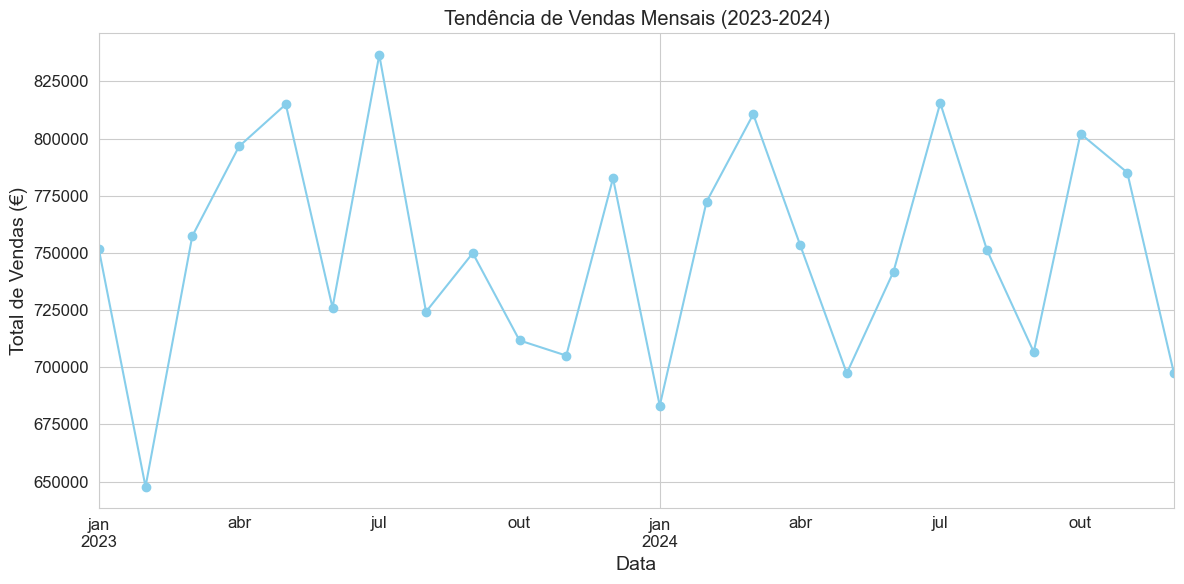

C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\2797490055.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria.values, y=vendas_por_categoria.index, palette='viridis')


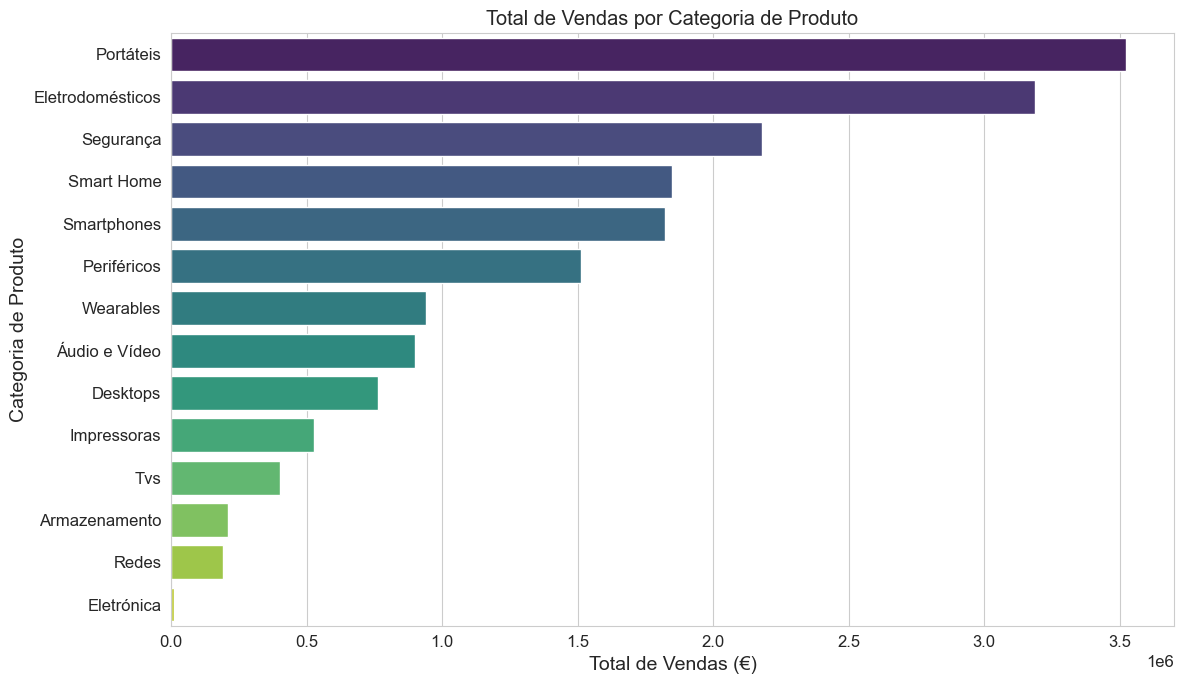

C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\2797490055.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_canal.index, y=vendas_por_canal.values, palette='mako')


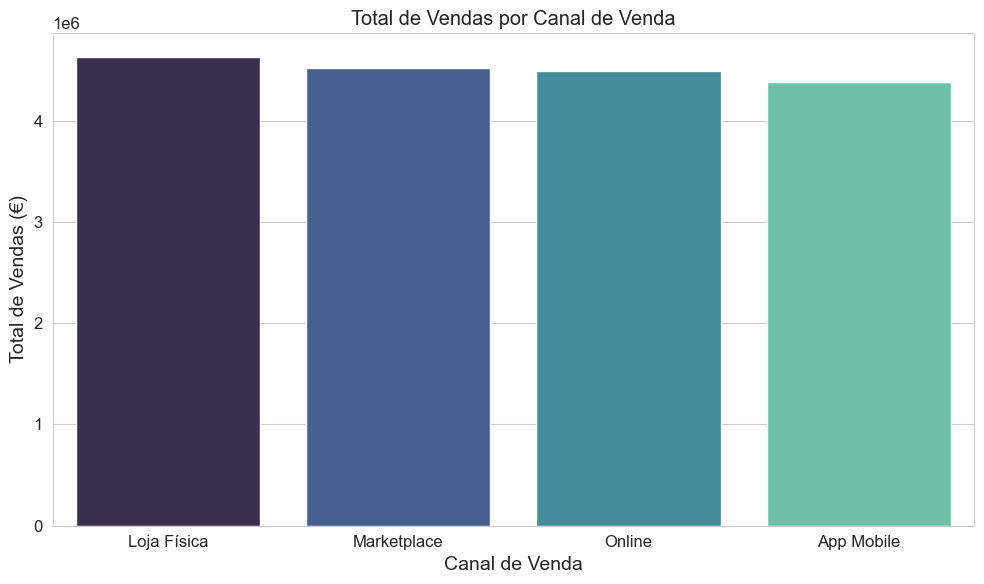

C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\2797490055.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos_quantidade.values, y=top_produtos_quantidade.index, palette='crest')


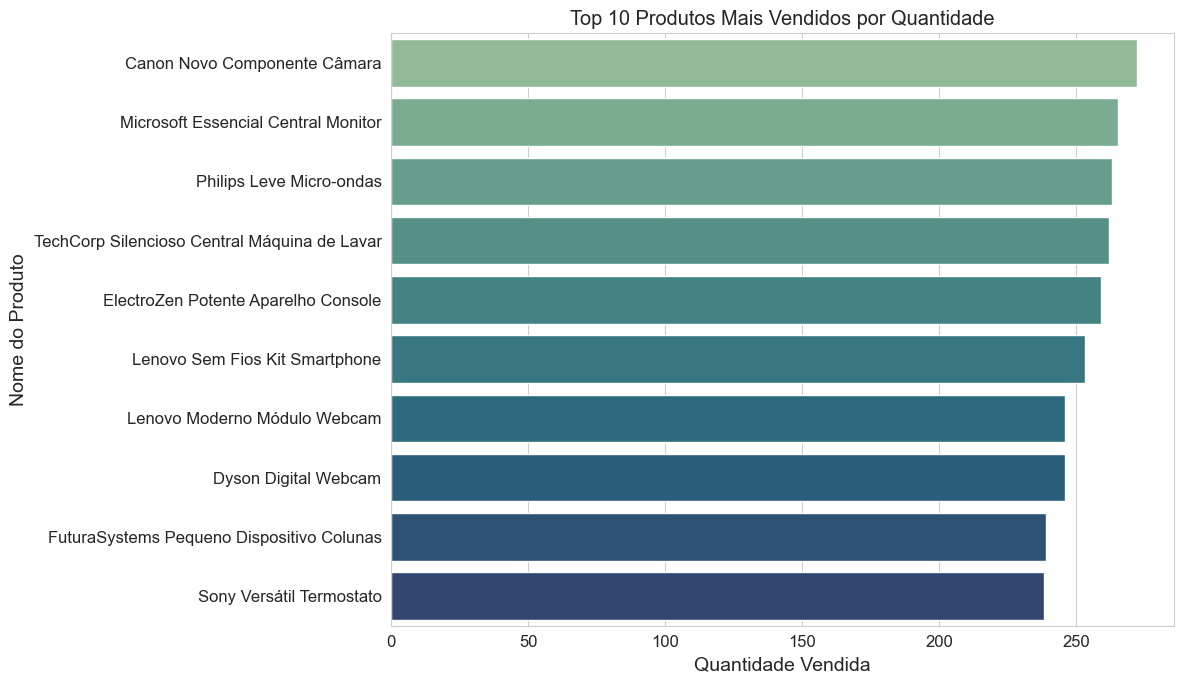

C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\2797490055.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=margem_por_categoria.values, y=margem_por_categoria.index, palette='magma')


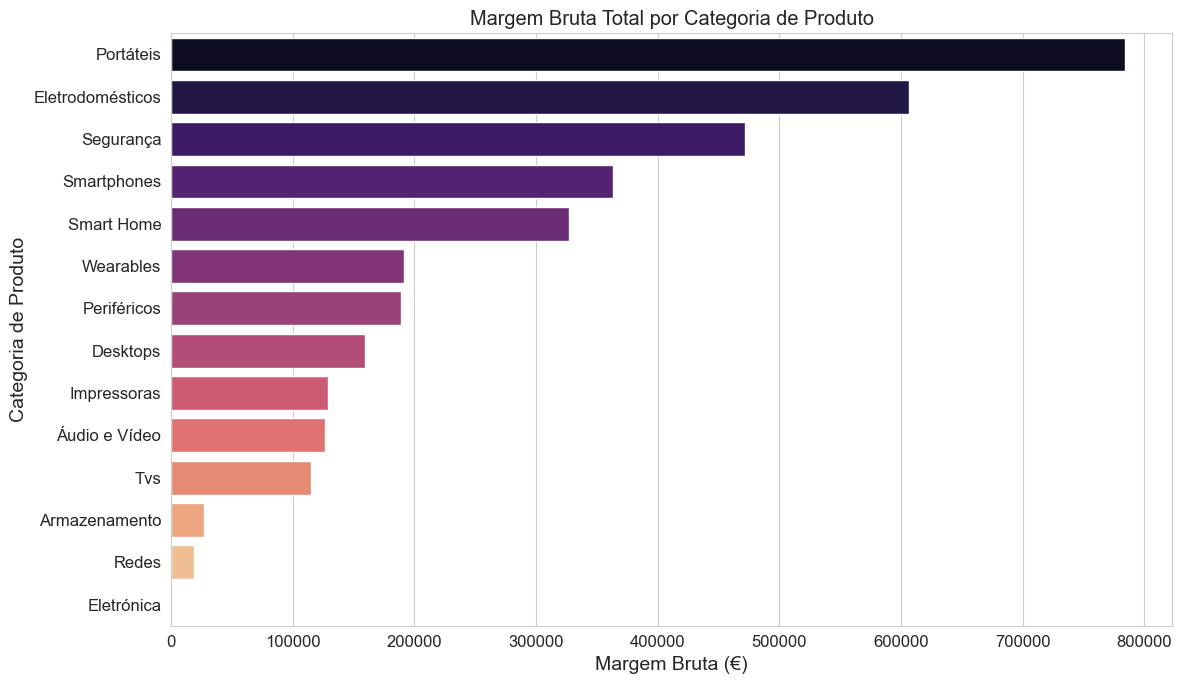

C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\2797490055.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_localizacao.values, y=vendas_por_localizacao.index, palette='rocket')


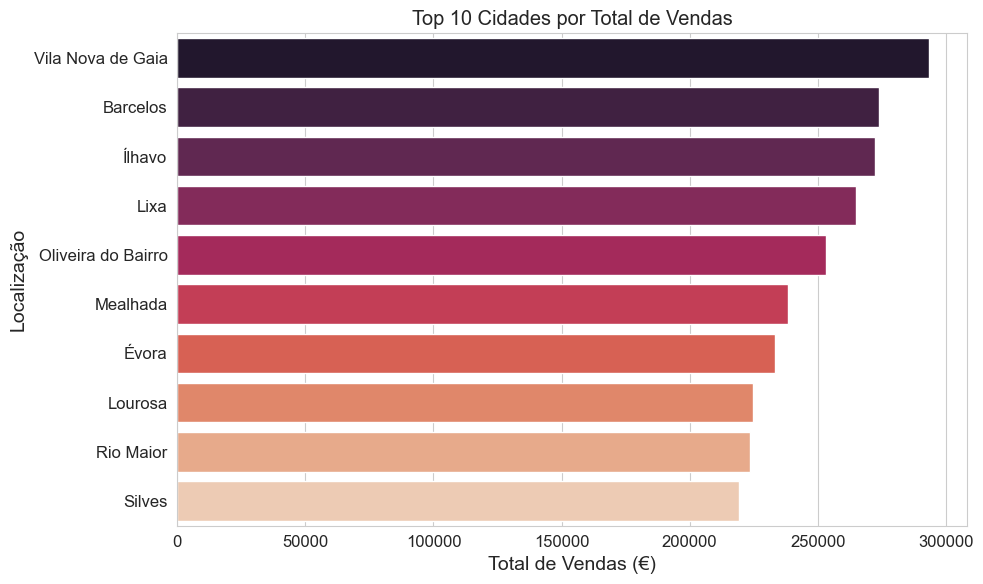

C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\2797490055.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_segmento.index, y=vendas_por_segmento.values, palette='cubehelix')


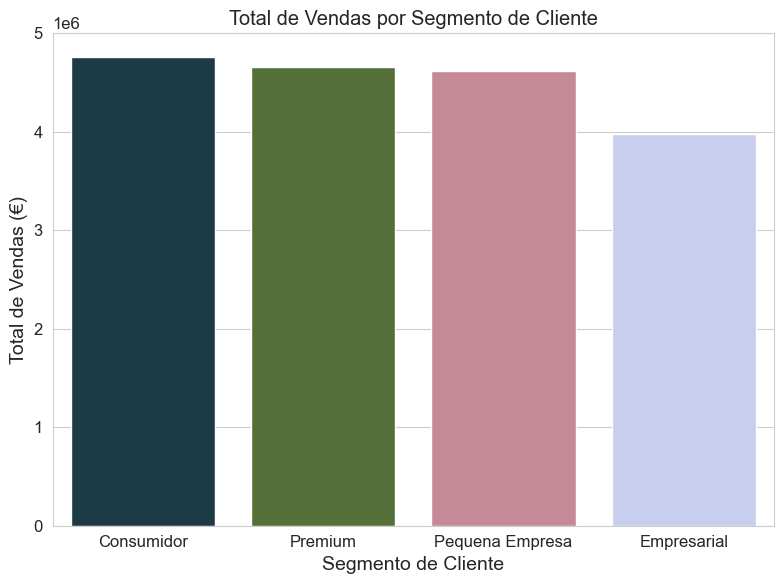

In [5]:
vendas_mensais = df_vendas.set_index('Data_Venda').resample('ME')['Preco_Total_Venda'].sum()
plt.figure(figsize=(12, 6))
vendas_mensais.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.title('Tendência de Vendas Mensais (2023-2024)')
plt.xlabel('Data')
plt.ylabel('Total de Vendas (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

vendas_por_categoria = df_vendas.groupby('Categoria')['Preco_Total_Venda'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=vendas_por_categoria.values, y=vendas_por_categoria.index, palette='viridis')
plt.title('Total de Vendas por Categoria de Produto')
plt.xlabel('Total de Vendas (€)')
plt.ylabel('Categoria de Produto')
plt.tight_layout()
plt.show()

vendas_por_canal = df_vendas.groupby('Canal_Venda')['Preco_Total_Venda'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_canal.index, y=vendas_por_canal.values, palette='mako')
plt.title('Total de Vendas por Canal de Venda')
plt.xlabel('Canal de Venda')
plt.ylabel('Total de Vendas (€)')
plt.tight_layout()
plt.show()

top_produtos_quantidade = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_produtos_quantidade.values, y=top_produtos_quantidade.index, palette='crest')
plt.title('Top 10 Produtos Mais Vendidos por Quantidade')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Nome do Produto')
plt.tight_layout()
plt.show()

margem_por_categoria = df_vendas.groupby('Categoria')['Margem_Bruta_Venda'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=margem_por_categoria.values, y=margem_por_categoria.index, palette='magma')
plt.title('Margem Bruta Total por Categoria de Produto')
plt.xlabel('Margem Bruta (€)')
plt.ylabel('Categoria de Produto')
plt.tight_layout()
plt.show()

vendas_por_localizacao = df_vendas.groupby('Localizacao')['Preco_Total_Venda'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_localizacao.values, y=vendas_por_localizacao.index, palette='rocket')
plt.title('Top 10 Cidades por Total de Vendas')
plt.xlabel('Total de Vendas (€)')
plt.ylabel('Localização')
plt.tight_layout()
plt.show()

vendas_por_segmento = df_vendas.groupby('Segmento')['Preco_Total_Venda'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=vendas_por_segmento.index, y=vendas_por_segmento.values, palette='cubehelix')
plt.title('Total de Vendas por Segmento de Cliente')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Total de Vendas (€)')
plt.tight_layout()
plt.show()

C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\1094771296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=custo_por_canal.index, y=custo_por_canal.values, palette='viridis')


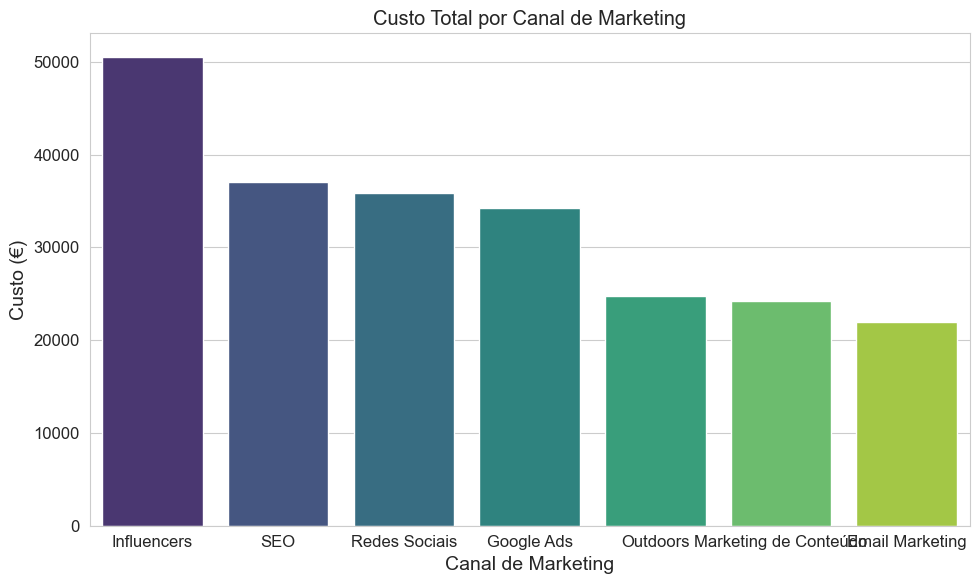

C:\Users\subrg\AppData\Local\Temp\ipykernel_25788\1094771296.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=receita_por_canal.index, y=receita_por_canal.values, palette='mako')


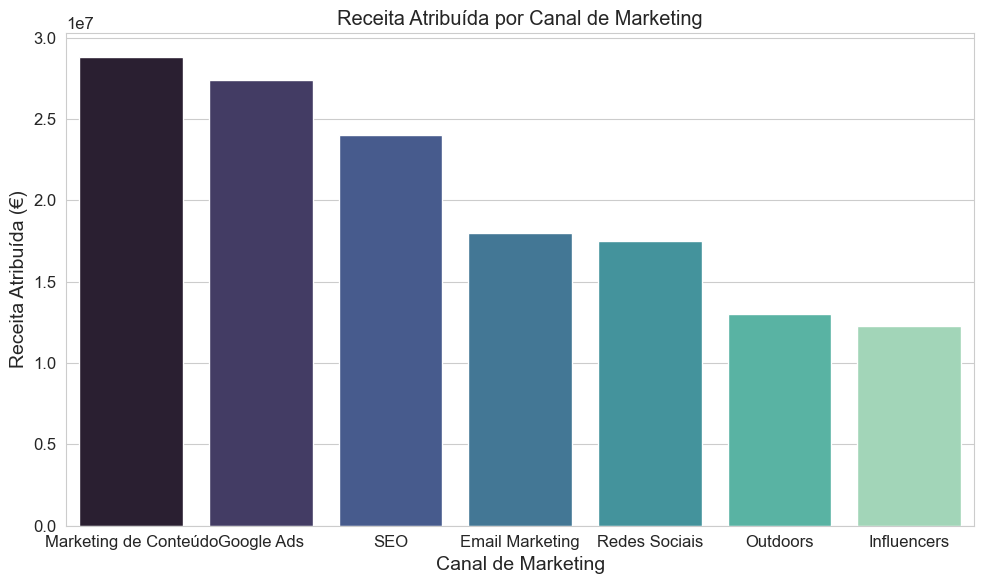

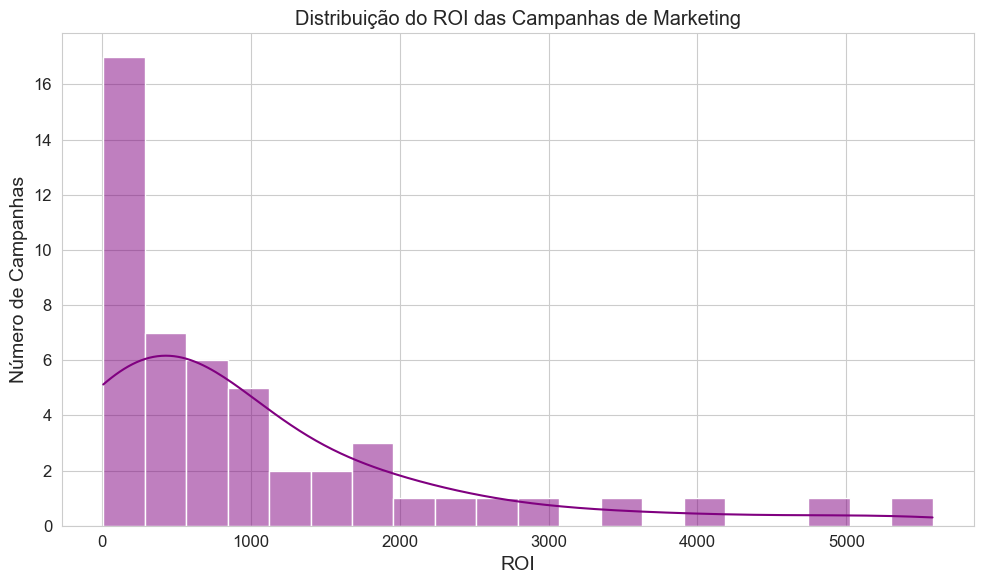

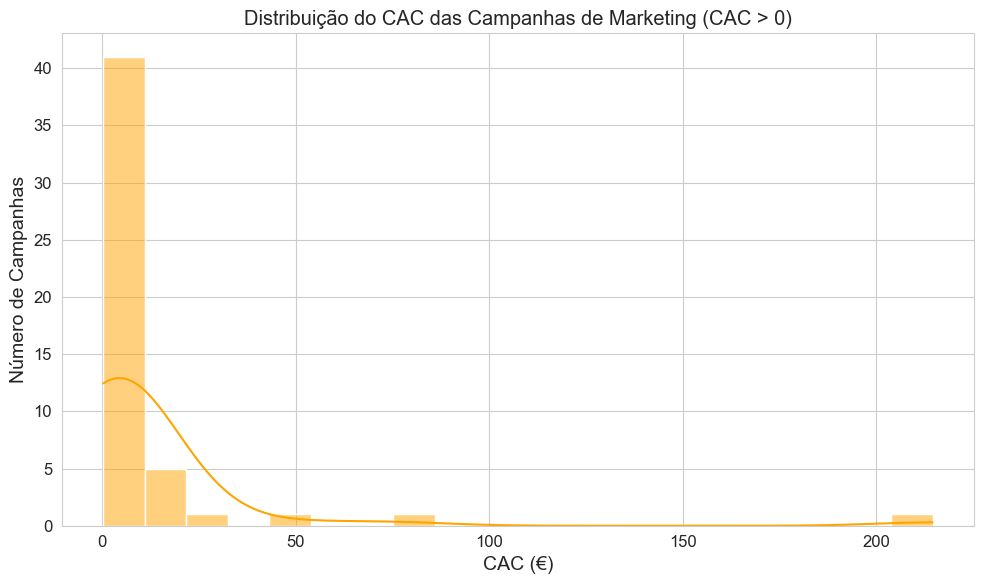

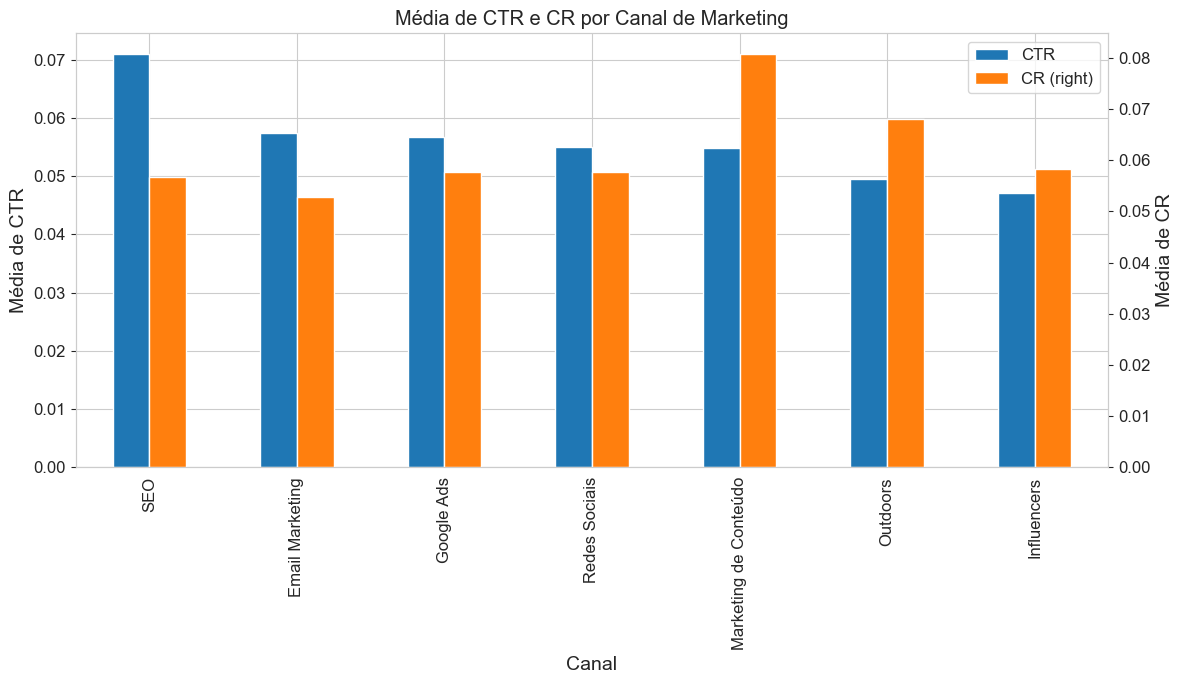

In [7]:
custo_por_canal = df_marketing_campanhas.groupby('Canal')['Custo'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=custo_por_canal.index, y=custo_por_canal.values, palette='viridis')
plt.title('Custo Total por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Custo (€)')
plt.tight_layout()
plt.show()

receita_por_canal = df_marketing_campanhas.groupby('Canal')['Receita_Atribuida'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=receita_por_canal.index, y=receita_por_canal.values, palette='mako')
plt.title('Receita Atribuída por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Receita Atribuída (€)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_marketing_campanhas['ROI'], bins=20, kde=True, color='purple')
plt.title('Distribuição do ROI das Campanhas de Marketing')
plt.xlabel('ROI')
plt.ylabel('Número de Campanhas')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_marketing_campanhas[df_marketing_campanhas['CAC'] > 0]['CAC'], bins=20, kde=True, color='orange')
plt.title('Distribuição do CAC das Campanhas de Marketing (CAC > 0)')
plt.xlabel('CAC (€)')
plt.ylabel('Número de Campanhas')
plt.tight_layout()
plt.show()

metrics_por_canal = df_marketing_campanhas.groupby('Canal')[['CTR', 'CR']].mean().sort_values(by='CTR', ascending=False)
ax = metrics_por_canal.plot(kind='bar', secondary_y='CR', figsize=(12, 7))
ax.set_ylabel('Média de CTR')
ax.right_ax.set_ylabel('Média de CR')
plt.title('Média de CTR e CR por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.tight_layout()
plt.show()

In [ ]:
print("## Insights Chave da Análise de Dados\n")

print("### Vendas:")
print(f"- Total de Vendas: €{df_vendas['Preco_Total_Venda'].sum():,.2f}")
print(f"- Total de Margem Bruta: €{df_vendas['Margem_Bruta_Venda'].sum():,.2f}")
print(f"- Produto mais vendido por quantidade: '{df_vendas.groupby('Nome_Produto')['Quantidade'].sum().idxmax()}' com {df_vendas.groupby('Nome_Produto')['Quantidade'].sum().max()} unidades.")
print(f"- Categoria com maior receita: '{df_vendas.groupby('Categoria')['Preco_Total_Venda'].sum().idxmax()}' com €{df_vendas.groupby('Categoria')['Preco_Total_Venda'].sum().max():,.2f}.")
print(f"- Canal de venda dominante: '{df_vendas.groupby('Canal_Venda')['Preco_Total_Venda'].sum().idxmax()}' com €{df_vendas.groupby('Canal_Venda')['Preco_Total_Venda'].sum().max():,.2f}.")
print("- A análise de vendas mensais mostra picos claros no final do ano, indicando sazonalidade.")
print("- As categorias de produtos de maior valor (ex: Smartphones, Portáteis) são os principais impulsionadores de receita, enquanto periféricos podem ter alto volume mas menor impacto financeiro total.")

print("\n### Marketing:")
print(f"- Canal de marketing mais caro: '{df_marketing_campanhas.groupby('Canal')['Custo'].sum().idxmax()}' com €{df_marketing_campanhas.groupby('Canal')['Custo'].sum().max():,.2f}.")
print(f"- Canal com maior receita atribuída: '{df_marketing_campanhas.groupby('Canal')['Receita_Atribuida'].sum().idxmax()}' com €{df_marketing_campanhas.groupby('Canal')['Receita_Atribuida'].sum().max():,.2f}.")

df_roi_sorted = df_marketing_campanhas.groupby('Canal')['ROI'].mean().sort_values(ascending=False)
print(f"- Canal com melhor ROI médio: '{df_roi_sorted.index[0]}' (ROI: {df_roi_sorted.iloc[0]:.2f}).")

# --- CORREÇÃO AQUI ---
# Verifica se existe algum ROI negativo antes de tentar aceder ao índice
roi_negativo_canais = df_roi_sorted[df_roi_sorted < 0]
if not roi_negativo_canais.empty:
    print(f"- Canal com pior ROI médio (considerando ROI < 0): '{roi_negativo_canais.index[-1]}' (ROI: {roi_negativo_canais.iloc[-1]:.2f}).")
else:
    print("- Não foram identificadas campanhas com ROI negativo nos dados analisados.")

df_cac_sorted = df_marketing_campanhas.groupby('Canal')['CAC'].mean().replace([np.inf, -np.inf], np.nan).dropna().sort_values()
print(f"- Canal com melhor CAC médio (mais eficiente): '{df_cac_sorted.index[0]}' (CAC: €{df_cac_sorted.iloc[0]:,.2f}).")
print(f"- Canal com pior CAC médio (menos eficiente): '{df_cac_sorted.index[-1]}' (CAC: €{df_cac_sorted.iloc[-1]:,.2f}).")
print("- Há uma clara correlação entre o custo e a receita atribuída em alguns canais, mas a eficiência (ROI, CAC) varia significativamente.")


print("\n## Recomendações Estratégicas\n")

print("1. Otimização de Portfólio de Produtos:")
print("   - Focar no marketing e otimização de stock para as categorias e produtos de maior receita e margem bruta. Considerar estratégias para impulsionar produtos de baixo desempenho.")

print("2. Alocação Inteligente do Orçamento de Marketing:")
print("   - Redirecionar o orçamento de marketing para canais com alto ROI e baixo CAC (ex: Email Marketing), enquanto se reavalia a eficácia de canais mais caros ou de baixo desempenho.")
print("   - Implementar testes A/B e análises mais profundas para entender por que certos canais têm desempenho inferior.")

print("3. Expansão e Otimização de Canais de Venda:")
print("   - Analisar mais a fundo o canal 'Online' e 'Loja Física' para replicar os seus sucessos. Considerar investir mais em canais com potencial não explorado (ex: App Mobile se o ROI for promissor).")

print("4. Planeamento Sazonal:")
print("   - Aproveitar os picos de vendas de final de ano com campanhas de marketing intensificadas e preparação de stock. Desenvolver estratégias para suavizar as quedas em períodos de menor atividade.")

print("5. Segmentação de Clientes:")
print("   - Desenvolver campanhas de marketing direcionadas para segmentos de clientes de alto valor ('Premium', 'Empresarial') e estratégias de retenção específicas.")

print("6. Monitorização Contínua:")
print("   - Implementar dashboards de Business Intelligence para monitorizar continuamente as principais métricas de vendas e marketing, permitindo decisões rápidas e baseadas em dados.")

## Insights Chave da Análise de Dados

### Vendas:
- Total de Vendas: €18,021,704.79
- Total de Margem Bruta: €3,508,518.71
- Produto mais vendido por quantidade: 'Canon Novo Componente Câmara' com 272 unidades.
- Categoria com maior receita: 'Portáteis' com €3,523,642.74.
- Canal de venda dominante: 'Loja Física' com €4,630,422.01.
- A análise de vendas mensais mostra picos claros no final do ano, indicando sazonalidade.
- As categorias de produtos de maior valor (ex: Smartphones, Portáteis) são os principais impulsionadores de receita, enquanto periféricos podem ter alto volume mas menor impacto financeiro total.

### Marketing:
- Canal de marketing mais caro: 'Influencers' com €50,543.69.
- Canal com maior receita atribuída: 'Marketing de Conteúdo' com €28,832,925.49.
- Canal com melhor ROI médio: 'Email Marketing' (ROI: 2144.80).


IndexError: single positional indexer is out-of-bounds